# Introduction to Machine Learning
## Author: Ankit Kariryaa
## Contact: ak@di.ku.dk
### January 8, 2026

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# Load the IRIS dataset
iris = load_iris()
X = iris.data[:, :2]  # first two features
y = iris.target

# Split the data: 50% train, 50% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0#, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

labels = iris.target_names

Training samples: 75
Test samples: 75


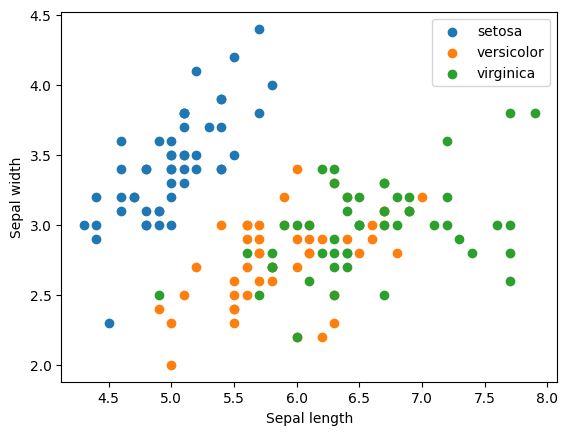

In [3]:
# Show Iris data
plt.figure()
for class_id, class_name in enumerate(labels):
    plt.scatter(
        X[y == class_id, 0],
        X[y == class_id, 1],
        label=class_name
    )

plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.legend()
plt.show()

# Unsupervised learning

# Structure discovery with KMeans clustering

In [4]:
def plot_Kmeans_clusters(X, kmeans):
    # To visualize cluster regions, we generate a grid over feature space and assign each grid point to the nearest centroid.
    # This reveals the implicit decision regions formed by KMeans, even though clustering is unsupervised.
    
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
    plt.scatter(
        kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        marker="x"
    )
    
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.show()

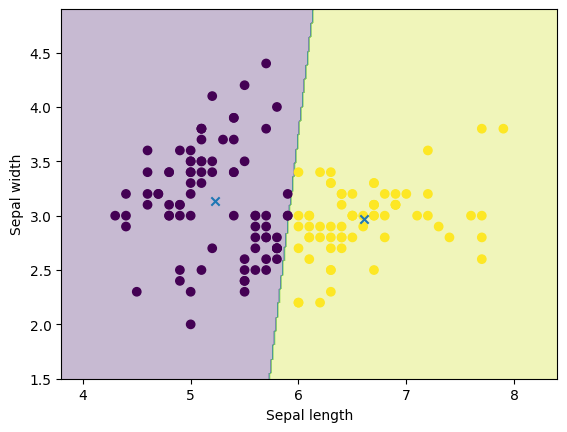

In [39]:
## Fitting KMeans with K=2
#TODO

plot_Kmeans_clusters(X, kmeans)

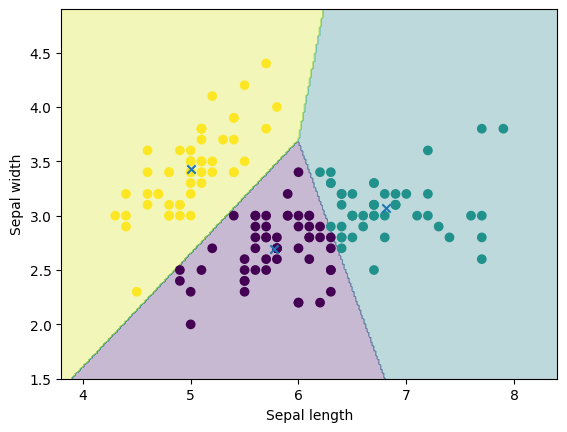

In [6]:
## Fitting KMeans with K=3
#TODO

plot_Kmeans_clusters(X, kmeans)

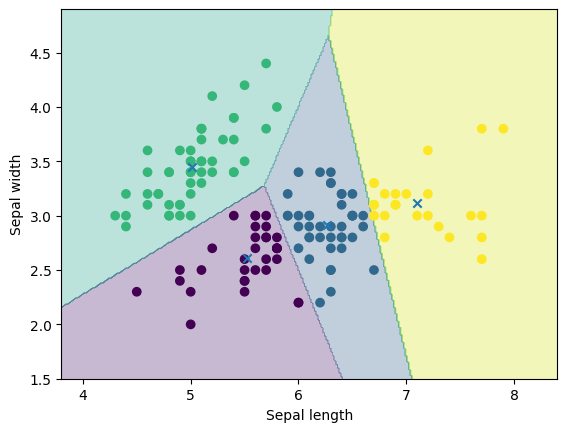

In [7]:
## Fitting KMeans with K=4
#TODO

plot_Kmeans_clusters(X, kmeans)

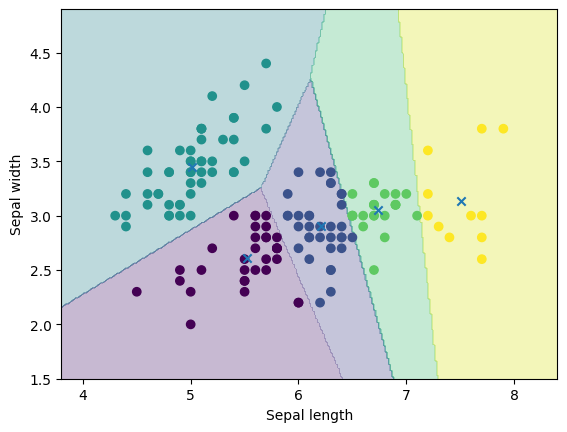

In [8]:
## Fitting KMeans with K=5
#TODO

plot_Kmeans_clusters(X, kmeans)

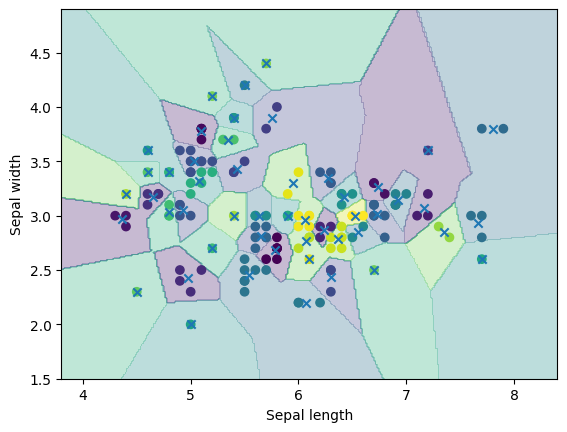

In [9]:
## Fitting KMeans with K=50
#TODO

plot_Kmeans_clusters(X, kmeans)

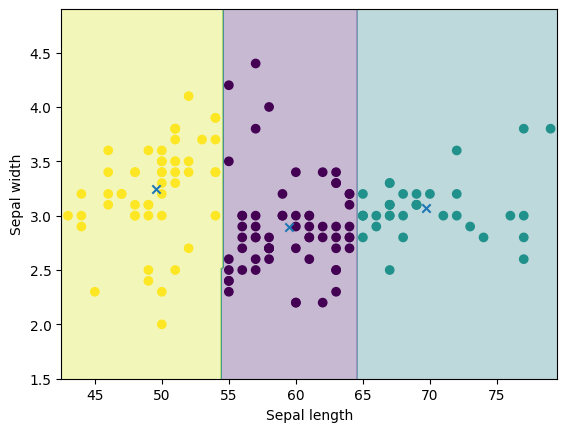

In [10]:
# Sensitivity to Feature Scaling
X_sca = X.copy()
X_sca[:,0] = X_sca[:,0] * 10
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_sca)
plot_Kmeans_clusters(X_sca, kmeans)

# Supervised leanring

# Nearest Neighbors Classification with KNNs

In [11]:
# Visualize decision boundaries
def plot_decision_boundary(X, y, classifier, title=""):
    # Plot the decision boundary of the classifier
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx1, xx2 = np.meshgrid(
        np.linspace(x1_min, x1_max, 300),
        np.linspace(x2_min, x2_max, 300)
    )

    Z = classifier.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    # Define colors for contour and points
    contour_cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # light shades
    scatter_cmap = ListedColormap(['#FF5555', '#55FF55', '#5555FF'])   # darker shades

    plt.figure()
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=contour_cmap)

    # Scatter points with slightly darker colors
    for class_id, class_name in enumerate(labels):
        plt.scatter(
            X[y == class_id, 0],
            X[y == class_id, 1],
            label=class_name,
            c=[scatter_cmap.colors[class_id]],
            edgecolor='k'
        )

    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.title(title)
    plt.legend()
    plt.show()


In [12]:
# Score the model, calculate confusion_matrix, accuracy, precision and recall
def evaluate_classification(y_test, y_pred, average='macro'):
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average=average, zero_division=0)
    rec = recall_score(y_test, y_pred, average=average, zero_division=0)

    print("Confusion Matrix:")
    print(cm)
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")


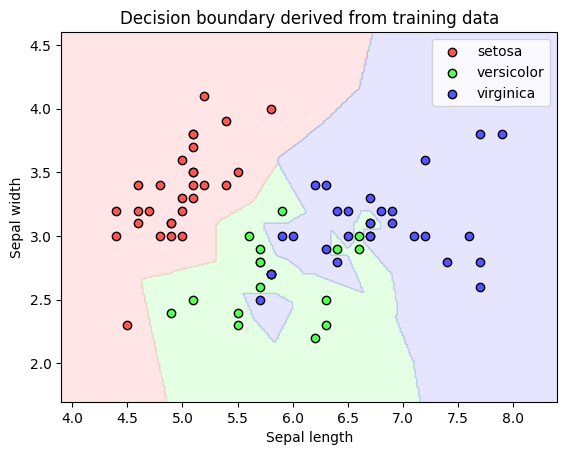

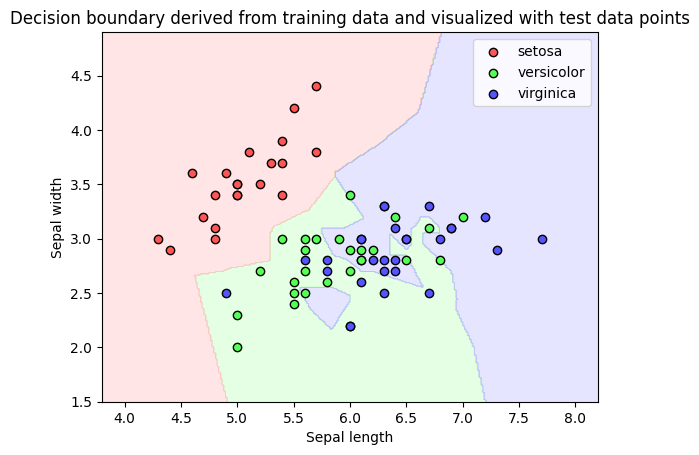

In [13]:
## KNN Classification with K=1
#TODO

plot_decision_boundary(X_train, y_train, knn, "Decision boundary derived from training data")
plot_decision_boundary(X_test, y_test, knn, "Decision boundary derived from training data and visualized with test data points")

In [14]:
# Make predictions on the test set
#TODO

# Score the model, calculate accuracy, precision and recall
evaluate_classification(y_test, y_pred)

Confusion Matrix:
[[21  0  0]
 [ 0 15 15]
 [ 0  8 16]]
Accuracy:  0.6933
Precision: 0.7228
Recall:    0.7222


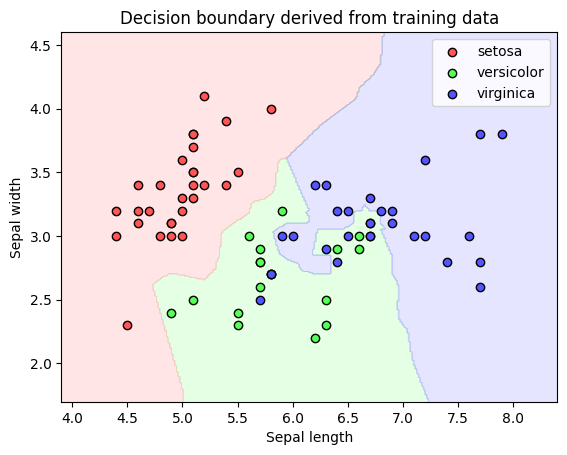

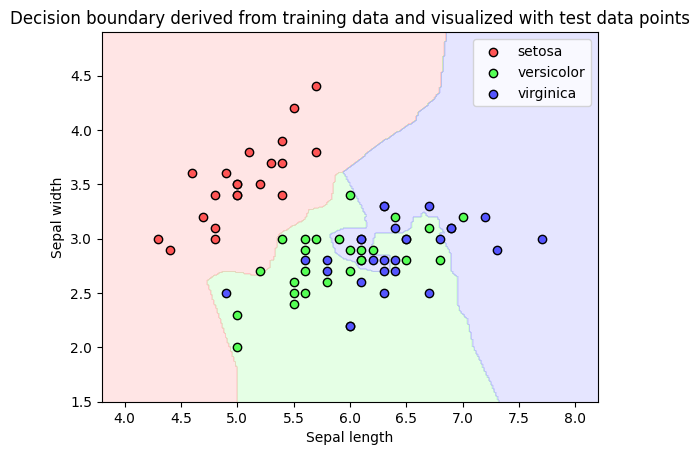

In [15]:
## KNN Classification with K=2
#TODO

plot_decision_boundary(X_train, y_train, knn, "Decision boundary derived from training data")
plot_decision_boundary(X_test, y_test, knn, "Decision boundary derived from training data and visualized with test data points")

In [16]:
# Make predictions on the test set
#TODO

# Score the model, calculate accuracy, precision and recall
evaluate_classification(y_test, y_pred)

Confusion Matrix:
[[21  0  0]
 [ 1 19 10]
 [ 0 13 11]]
Accuracy:  0.6800
Precision: 0.6907
Recall:    0.6972


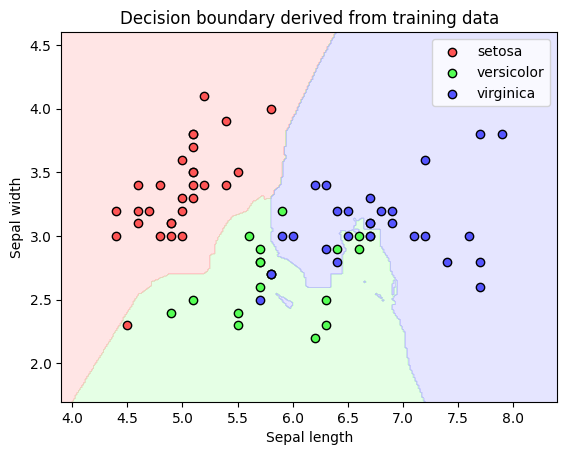

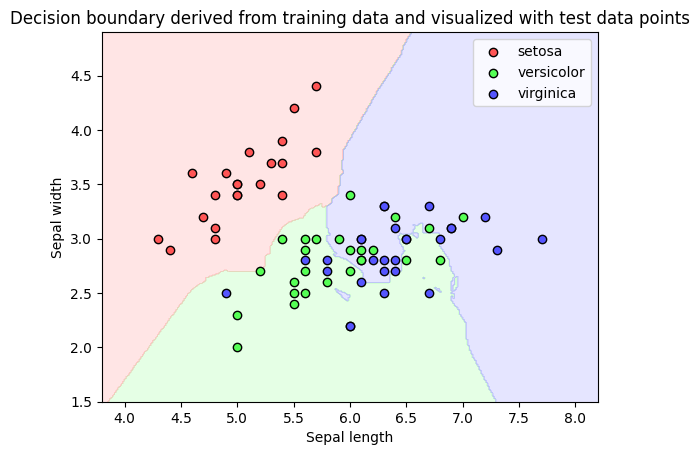

In [17]:
## KNN Classification with K=3
#TODO

plot_decision_boundary(X_train, y_train, knn, "Decision boundary derived from training data")
plot_decision_boundary(X_test, y_test, knn, "Decision boundary derived from training data and visualized with test data points")

In [ ]:
# Make predictions on the test set
#TODO

# Score the model, calculate accuracy, precision and recall
evaluate_classification(y_test, y_pred)

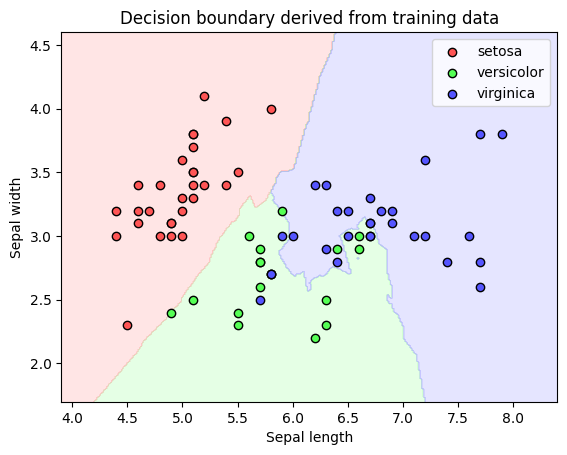

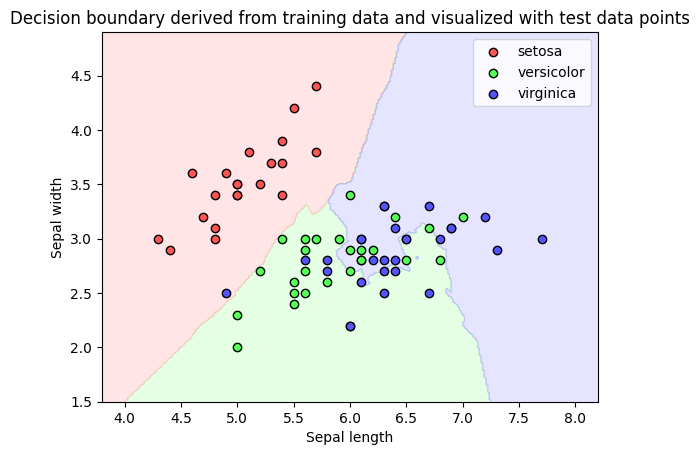

In [18]:
## KNN Classification with K=5
#TODO

plot_decision_boundary(X_train, y_train, knn, "Decision boundary derived from training data")
plot_decision_boundary(X_test, y_test, knn, "Decision boundary derived from training data and visualized with test data points")

In [19]:
# Make predictions on the test set
#TODO

# Score the model, calculate accuracy, precision and recall
evaluate_classification(y_test, y_pred)

Confusion Matrix:
[[21  0  0]
 [ 0 17 13]
 [ 1 11 12]]
Accuracy:  0.6667
Precision: 0.6806
Recall:    0.6889


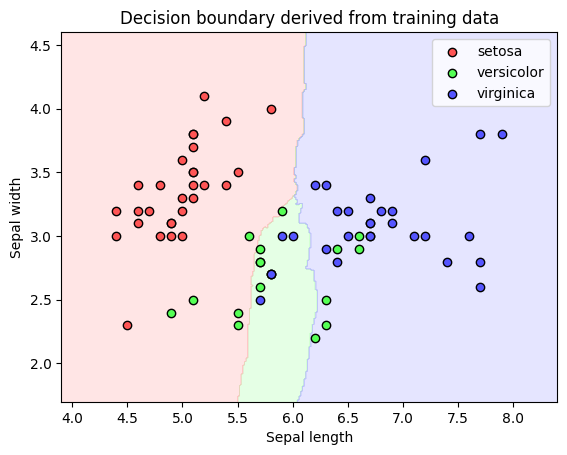

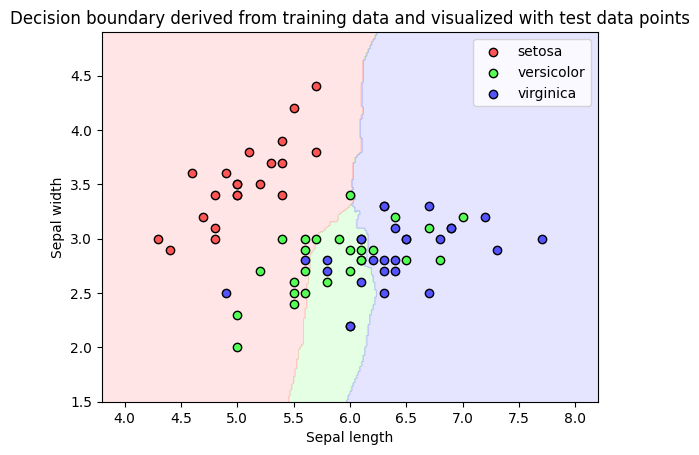

In [20]:
## KNN Classification with K=50
#TODO

plot_decision_boundary(X_train, y_train, knn, "Decision boundary derived from training data")
plot_decision_boundary(X_test, y_test, knn, "Decision boundary derived from training data and visualized with test data points")

In [21]:
# Make predictions on the test set
#TODO

# Score the model, calculate accuracy, precision and recall
evaluate_classification(y_test, y_pred)

Confusion Matrix:
[[21  0  0]
 [13  9  8]
 [ 2  5 17]]
Accuracy:  0.6267
Precision: 0.6354
Recall:    0.6694


# Logistic Regression

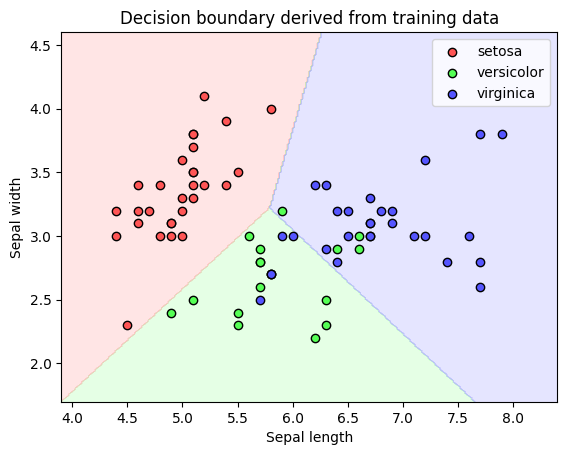

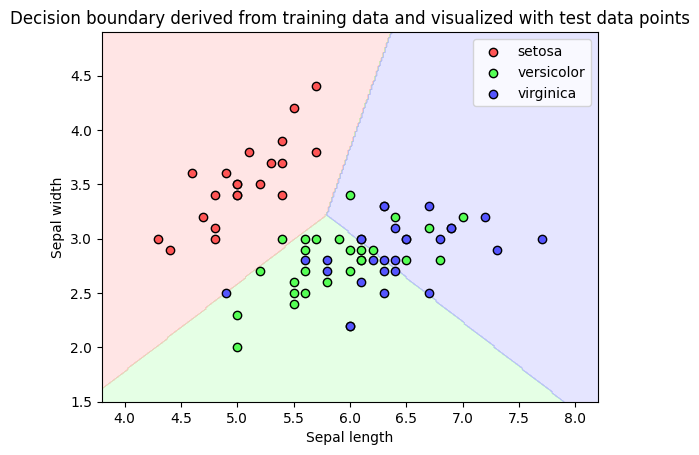

In [22]:
# Classification with Logistic Regression
#TODO

plot_decision_boundary(X_train, y_train, logistic_reg, "Decision boundary derived from training data")
plot_decision_boundary(X_test, y_test, logistic_reg, "Decision boundary derived from training data and visualized with test data points")

In [23]:
# Make predictions on the test set
#TODO

# Score the model, calculate accuracy, precision and recall
evaluate_classification(y_test, y_pred)

Confusion Matrix:
[[21  0  0]
 [ 1 19 10]
 [ 0 11 13]]
Accuracy:  0.7067
Precision: 0.7177
Recall:    0.7250


/home/ankit/Teaching/PPDS2025_2026/notebook/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 10 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


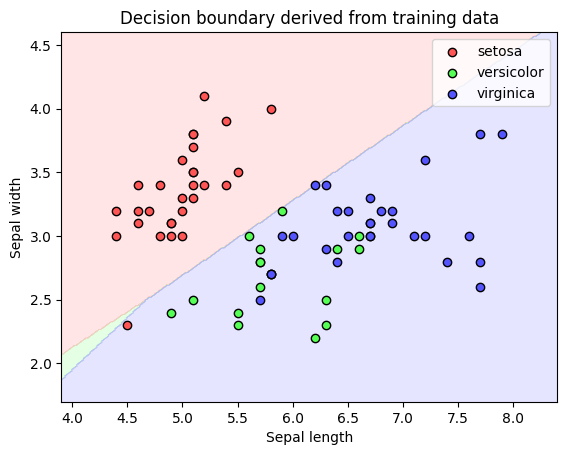

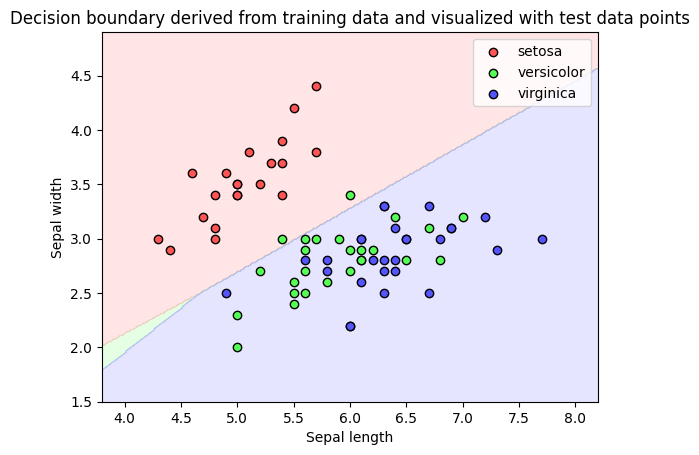

In [24]:
# Classification with Logistic Regression max_iter=10
#TODO

plot_decision_boundary(X_train, y_train, logistic_reg, "Decision boundary derived from training data")
plot_decision_boundary(X_test, y_test, logistic_reg, "Decision boundary derived from training data and visualized with test data points")

In [25]:
# Make predictions on the test set
#TODO

# Score the model, calculate accuracy, precision and recall
evaluate_classification(y_test, y_pred)

Confusion Matrix:
[[21  0  0]
 [ 2  0 28]
 [ 0  0 24]]
Accuracy:  0.6000
Precision: 0.4582
Recall:    0.6667


/home/ankit/Teaching/PPDS2025_2026/notebook/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 20 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=20).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


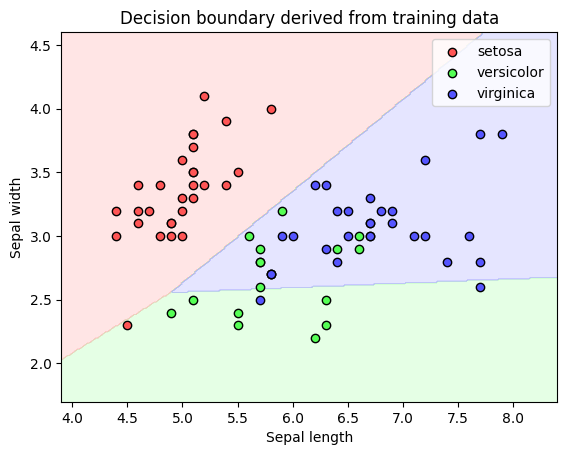

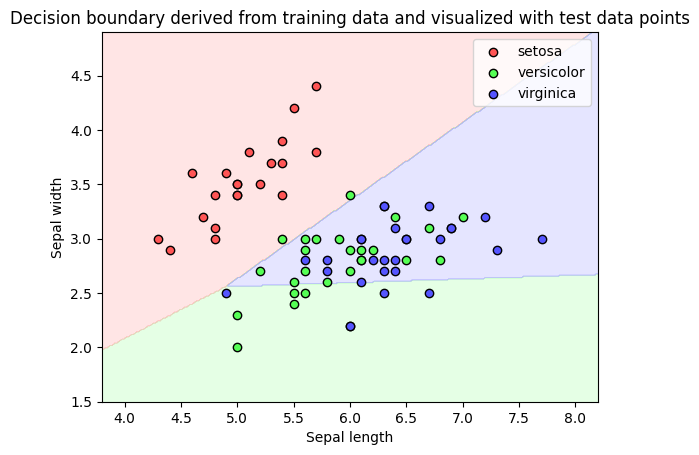

In [26]:
# Classification with Logistic Regression max_iter=20
#TODO

plot_decision_boundary(X_train, y_train, logistic_reg, "Decision boundary derived from training data")
plot_decision_boundary(X_test, y_test, logistic_reg, "Decision boundary derived from training data and visualized with test data points")

In [27]:
# Make predictions on the test set
#TODO

# Score the model, calculate accuracy, precision and recall
evaluate_classification(y_test, y_pred)

Confusion Matrix:
[[21  0  0]
 [ 2  6 22]
 [ 0  4 20]]
Accuracy:  0.6267
Precision: 0.6631
Recall:    0.6778


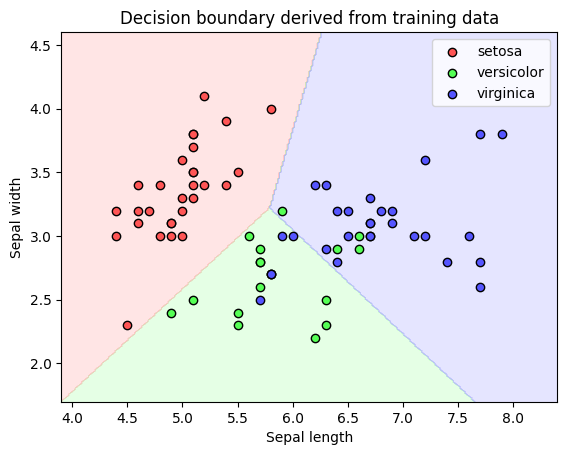

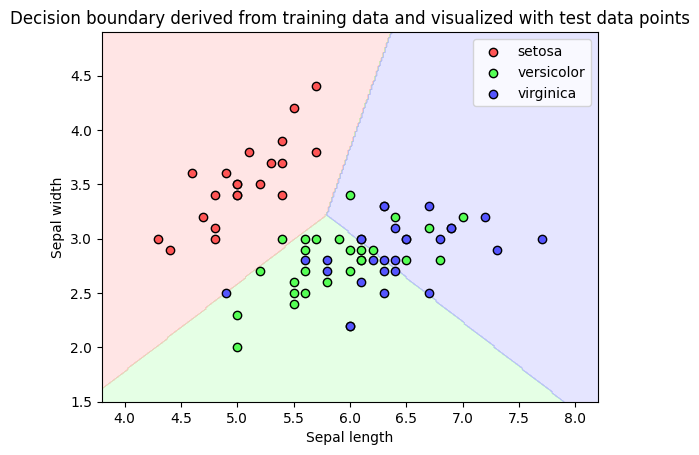

In [28]:
# Classification with Logistic Regression max_iter=50
#TODO

plot_decision_boundary(X_train, y_train, logistic_reg, "Decision boundary derived from training data")
plot_decision_boundary(X_test, y_test, logistic_reg, "Decision boundary derived from training data and visualized with test data points")

In [29]:
# Make predictions on the test set
#TODO

# Score the model, calculate accuracy, precision and recall
evaluate_classification(y_test, y_pred)

Confusion Matrix:
[[21  0  0]
 [ 1 19 10]
 [ 0 11 13]]
Accuracy:  0.7067
Precision: 0.7177
Recall:    0.7250


# Decision Tree

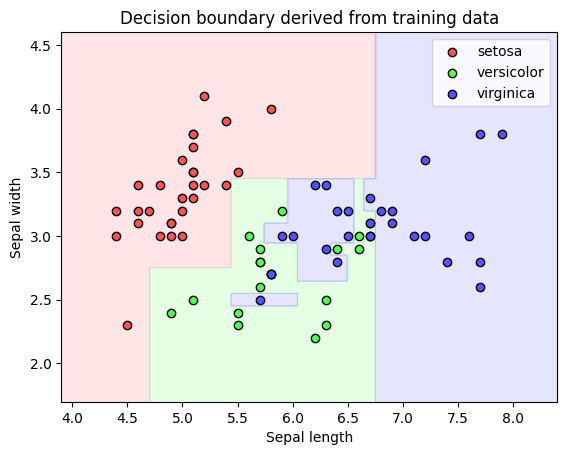

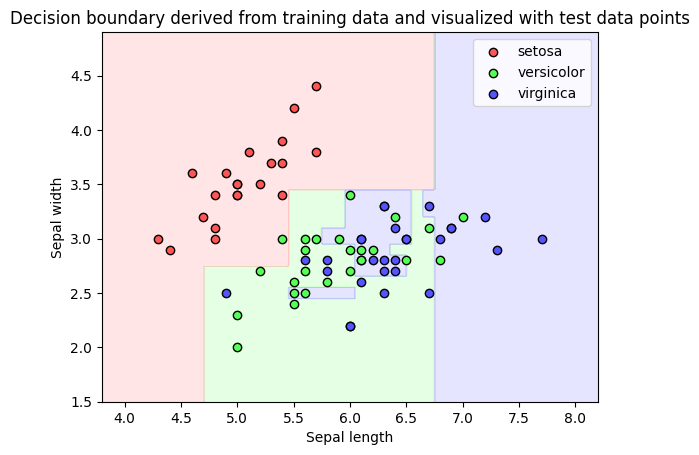

In [30]:
# Classification with DecisionTreeClassifier
#TODO

plot_decision_boundary(X_train, y_train, tree, "Decision boundary derived from training data")
plot_decision_boundary(X_test, y_test, tree, "Decision boundary derived from training data and visualized with test data points")

In [31]:
# Make predictions on the test set
#TODO

# Score the model, calculate accuracy, precision and recall
evaluate_classification(y_test, y_pred)

Confusion Matrix:
[[21  0  0]
 [ 1 14 15]
 [ 0  8 16]]
Accuracy:  0.6800
Precision: 0.7023
Recall:    0.7111


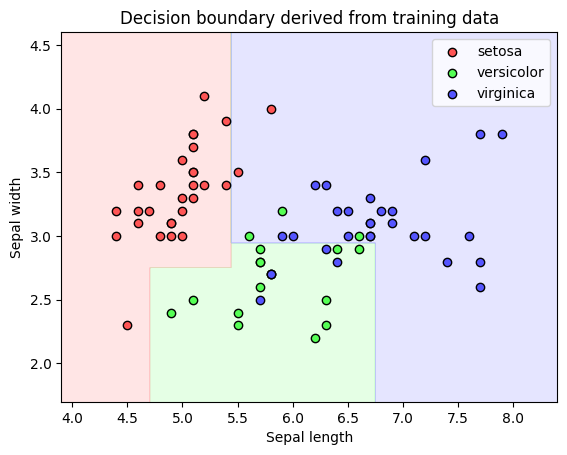

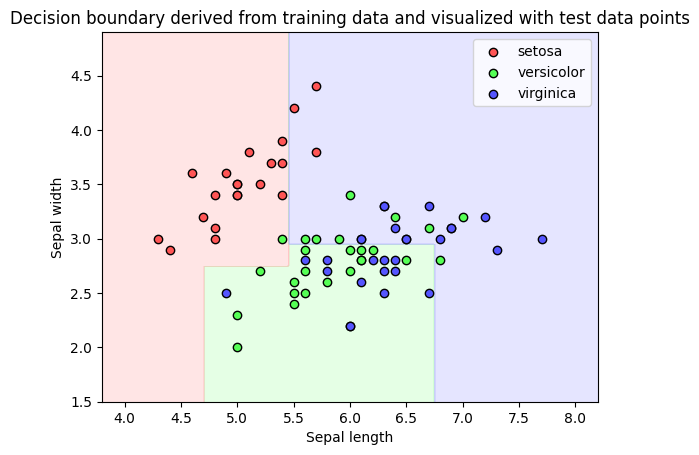

In [32]:
# Classification with DecisionTreeClassifier, max
#TODO

plot_decision_boundary(X_train, y_train, tree, "Decision boundary derived from training data")
plot_decision_boundary(X_test, y_test, tree, "Decision boundary derived from training data and visualized with test data points")

In [33]:
# Make predictions on the test set
#TODO

# Score the model, calculate accuracy, precision and recall
evaluate_classification(y_test, y_pred)

Confusion Matrix:
[[18  0  3]
 [ 1 18 11]
 [ 0 13 11]]
Accuracy:  0.6267
Precision: 0.6560
Recall:    0.6385


# Random Forests

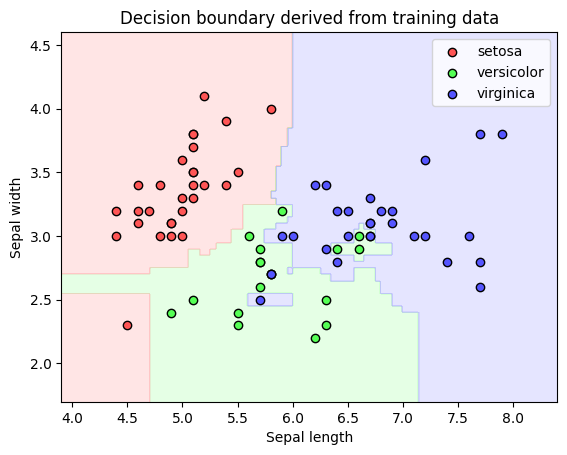

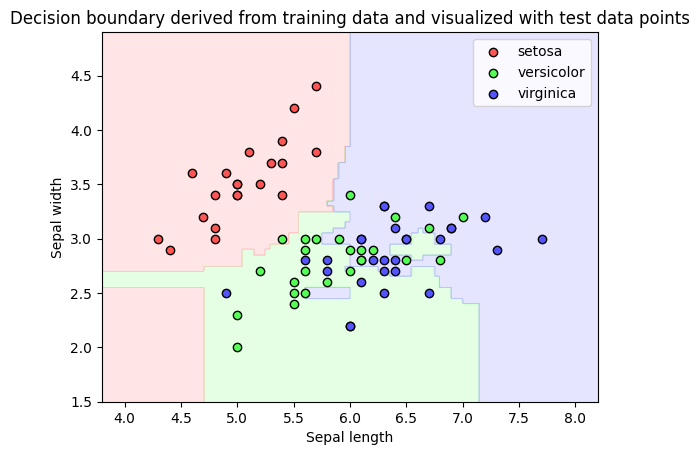

In [34]:
# Classification with RandomForestClassifier
#TODO

plot_decision_boundary(X_train, y_train, forest, "Decision boundary derived from training data")
plot_decision_boundary(X_test, y_test, forest, "Decision boundary derived from training data and visualized with test data points")

In [35]:
# Make predictions on the test set
#TODO

# Score the model, calculate accuracy, precision and recall
evaluate_classification(y_test, y_pred)

Confusion Matrix:
[[21  0  0]
 [ 1 15 14]
 [ 0  9 15]]
Accuracy:  0.6800
Precision: 0.6989
Recall:    0.7083


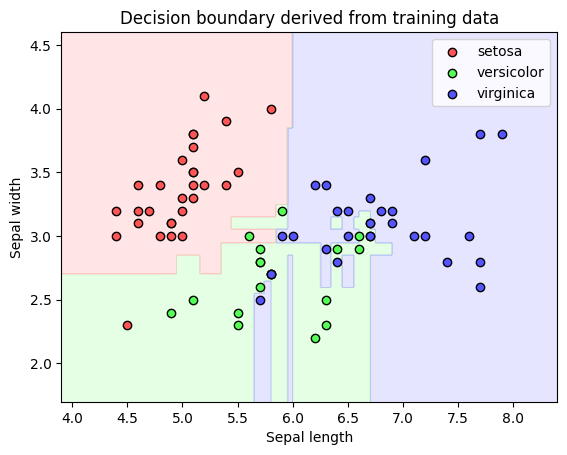

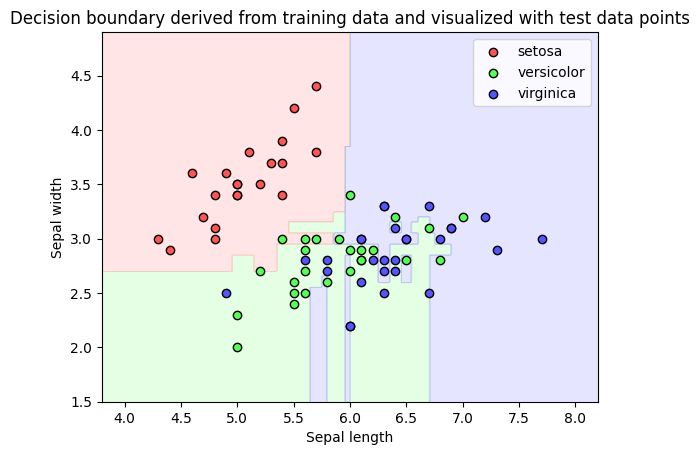

In [36]:
# Classification with RandomForestClassifier n_estimators = 3
#TODO

plot_decision_boundary(X_train, y_train, forest, "Decision boundary derived from training data")
plot_decision_boundary(X_test, y_test, forest, "Decision boundary derived from training data and visualized with test data points")

In [37]:
# Make predictions on the test set
#TODO

# Score the model, calculate accuracy, precision and recall
evaluate_classification(y_test, y_pred)

Confusion Matrix:
[[21  0  0]
 [ 3 16 11]
 [ 0 11 13]]
Accuracy:  0.6667
Precision: 0.6698
Recall:    0.6917
